In [4]:
import cv2
import numpy as np

def create_binary_mask(size=255, inner_radius=50, outer_radius=100):
    mask = np.zeros((size, size), dtype=np.uint8)
    center = (size // 2, size // 2)
    # Draw the outer circle (white)
    cv2.circle(mask, center, outer_radius, 255, -1)
    # Draw the inner circle (black) to create a ring
    cv2.circle(mask, center, inner_radius, 0, -1)
    return mask

# Generate the binary mask
binary_mask = create_binary_mask()

# Display the binary mask
cv2.imshow("Centered Binary Mask", binary_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np

def bit_plane_slicing(image, bit):
    # Extract the specific bit plane
    return ((image >> bit) & 1) * 255

# Load a grayscale image
image = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)

# Generate and display bit-plane images from bit 0 to bit 7
for bit in range(8):
    bitplane = bit_plane_slicing(image, bit)
    cv2.imshow(f'Bit Plane {bit}', bitplane)
    cv2.waitKey(0)

cv2.destroyAllWindows()


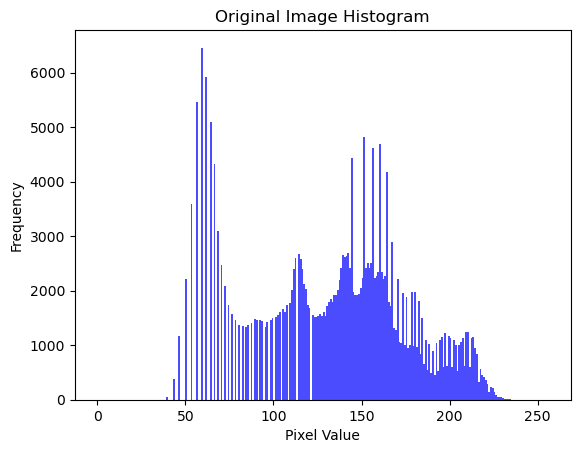

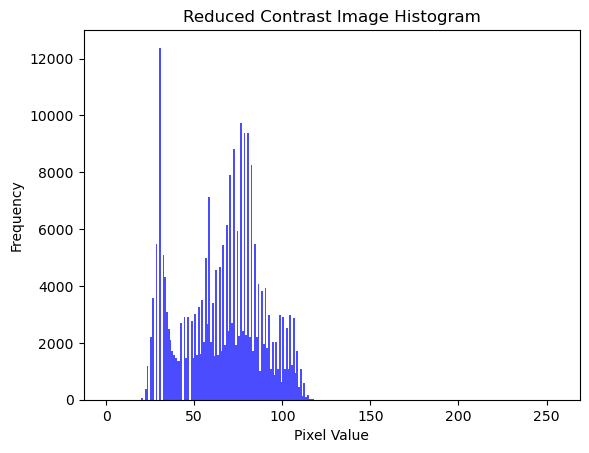

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_contrast(image, alpha=0.5, beta=0):
    # Reduce contrast using a linear transformation
    reduced = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return reduced

def plot_histogram(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    plt.show()

# Load a grayscale image
image = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)

# Reduce the contrast of the image
contrast_reduced = reduce_contrast(image)

# Display the original and contrast-reduced images
cv2.imshow("Original Image", image)
cv2.imshow("Contrast Reduced Image", contrast_reduced)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histograms of both images
plot_histogram(image, "Original Image Histogram")
plot_histogram(contrast_reduced, "Reduced Contrast Image Histogram")
